In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import nlopt
import seaborn as sns
from statsrat import perform_oat, oat_grid, make_sim_data, learn_plot
from statsrat.expr.predef.cat import ibre, lrn_pred
from statsrat.rw.predef import Kalman, Kalman_intercept
from scipy import stats

In [2]:
m = Kalman_intercept

par_val = [0.5, 0.1, 4, 5]
print(m.pars)
trials = ibre.make_trials()
#trials = lrn_pred.make_trials()
ds = m.simulate(trials = trials, par_val = par_val)

            min   max  default
drift_var   0.0   2.0     0.01
u_var       0.0   5.0     0.10
w_var0      0.0  10.0     1.00
resp_scale  0.0  10.0     1.00


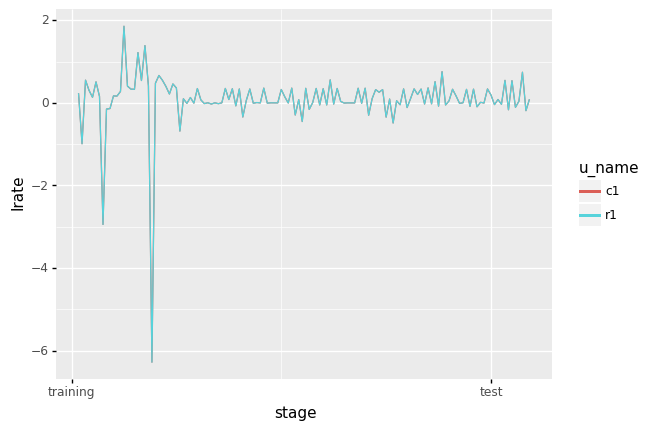

<ggplot: (276765877)>

In [3]:
learn_plot(ds, 'lrate', sel = {'f_name': ['pc1'], 'u_name': ['c1', 'r1']}, drop_zeros = True)

In [7]:
# ordinal adequacy test (OAT) for the IBRE

# IMPORTANT: It turns out that the old version (which seemed to produce a larger IBRE) was defective
# in that learning rates were forced to be positive (which is completely wrong for the Kalman filter).

n = 100
max_time = 120
#algorithm = nlopt.GN_DIRECT_L
#algorithm = nlopt.GN_AGS
algorithm = nlopt.GN_ORIG_DIRECT
#algorithm = nlopt.GD_STOGO

oat_result = perform_oat(m, ibre, minimize = False, n = n, max_time = max_time, algorithm = algorithm)
print(oat_result[0])
print(oat_result[1])

Maximizing OAT score.
[1.  2.5 5.  5. ]
[1.666 2.5   5.    5.   ]
[0.334 2.5   5.    5.   ]
[1.    4.166 5.    5.   ]
[1.    0.834 5.    5.   ]
[1.         2.5        8.33266667 5.        ]
[1.         2.5        1.66733333 5.        ]
[1.666 0.834 5.    5.   ]
[0.334 0.834 5.    5.   ]
[1.         0.834      8.33266667 5.        ]
[1.         0.834      1.66733333 5.        ]
[1.666 0.834 5.    5.   ]
[1.91575 0.834   5.      5.     ]
[1.91575 1.45875 5.      5.     ]
[1.999   1.45875 5.      5.     ]
[1.999 0.834 5.    5.   ]
[1.91575 0.20925 5.      5.     ]
[1.9365625 0.521625  5.        5.       ]
[1.957375 1.146375 5.       5.      ]
[1.957375 0.834    5.       5.      ]
     drift_var  u_var  w_var0          mean         lower         upper
max    1.91575  0.834     5.0  9.388617e-08 -4.903335e-08  2.368057e-07
  schedule          trial_name u_name  mean_resp
0   design  pc1.pr1 -> nothing     c1   0.420565
1   design  pc1.pr1 -> nothing     c2   0.079435
2   design  pc1.pr1 -> 

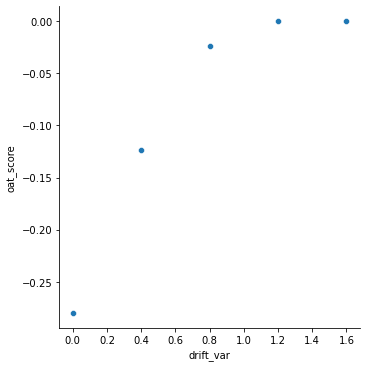

In [6]:
free_par = 'drift_var'
fixed_values = {'u_var': 0.1, 'w_var0': 8.0, 'resp_scale': 5.0}

df = oat_grid(m,
              ibre,
              free_par = free_par,
              fixed_values = fixed_values,
              n_points = 5)
sns.relplot(x = free_par, y = 'oat_score', data = df)